
### Designing Accessible Data Visualizations


The reading has highlighted the importance of accessibility in the area of data visualization and graph design, and it's surprising how it impacts not only user understanding but also their ability to take meaningful actions based on the information presented. It's eye-opening to see how this plays out in real-world scenarios, particularly in fields like medicine, where a poorly designed or confusing data visualization could literally be a matter of life and death.

The dos and don'ts provided in the reading offer a clear roadmap for creating accessible data visualizations, and I will start to incorporate these principles into my design practice. For instance, I've become more cautious about relying too heavily on color, recognizing the need to incorporate patterns and shapes to enhance accessibility. Additionally, the importance of adding context and explanations has become clear, and I will integrate the use of accessibility tools during the design process like color blindly.

One aspect that particularly resonated with me is the need to create universally accessible graphs. I had not previously considered how people with varying degrees of color perception might see the visualizations. The reading has provided me with a holistic view, considering users with full color vision, partial color perception, and complete colorblindness. It's crucial to choose colors thoughtfully to avoid causing discomfort or anxiety. I've started using color-blindness simulators to ensure that my graphs are clear and accessible to everyone. It's reshaped my perspective on data visualization, emphasizing that it's not just about creating visually appealing graphs but ensuring that the information is easily digestible for all.


The example of the voice-over narration for electoral results was a compelling illustration of the need to design for diverse audiences. The importance of screen readers and how they interact with graphs has become evident. Incorporating aria label properties into the graph is a crucial step, ensuring that the visual content is equally accessible. It's not just about creating the visual; it's about making sure that everyone can access and understand it. It's also essential to test how the graphs appear on different screens and to make them interactive for users who may not use a traditional mouse or trackpad.

Using clear and simple language to explain data has now become a central focus of my design approach. It's not just about presenting numbers and charts; it's about helping users truly comprehend the information. Providing context is key, especially for users with anxiety or those who prefer a more narrative approach to data interpretation.

The Google Maps illustration example has driven home the idea of delivering information in multiple formats, each of which is both effective and not overwhelming for the audience. The article emphasized that presenting the same information in different formats instilled confidence in users about the information. Additionally, it is crucial to depict information as a coherent narrative, considering how the user will engage with the graph. The user should be at the core of the graph we are constructing.

In summary, these key points underscore the critical importance of accessibility in data visualization, emphasizing inclusivity, usability, and clarity, regardless of the content or context. In my final project, I'm committed to taking all of these considerations into account. I'll pay close attention to how screen readers interact with my graphs and ensure they're interactive for everyone. I'll also prioritize sharing insights effectively, recognizing that data visualization isn't just about creating visuals but making sure the information is easily understandable by a diverse audience with varying levels of visibility. I'll achieve this by adding more layers to my graphs and including text to highlight critical information in a way that enhances comprehension for all users.


### Improvement in the graph

#### Import Libraries

In [1]:
import pandas as pd
import altair as alt
import json

#### Read Dataset

In [2]:
firearm= pd.read_csv('firearm_deaths_usafacts (1).csv')

#### Graph from HW3

In [3]:
gender_firearm_time = alt.Chart(firearm).transform_fold(
    ['Male','Female'],as_=['Gender','Count']

).mark_line( ).encode(
    alt.X('Years:O',
          axis = alt.Axis(labelAngle=-45)),
    alt.Y('Count:Q'),
    alt.Color('Gender:N'),
    tooltip = ['Years:O','Count:Q','Gender:N']
    
).properties(
    title=('Firearm deaths Across Years By Gender 1981-2021')
)
gender_firearm_time

alt.Chart(...)

In the HW3, I created a graph depicting firearm-related deaths across different age groups in the United States  from 1981 to 2021. In this graph, the distinction between males and females is clearly evident through the use of different colors. However, when this same graph is viewed by individuals with Monochromacy or Acromatopsia, those with these visual limitations may struggle to differentiate between the labels denoting "Female" and "Male."

### Graph for Monochromacy user from HW3

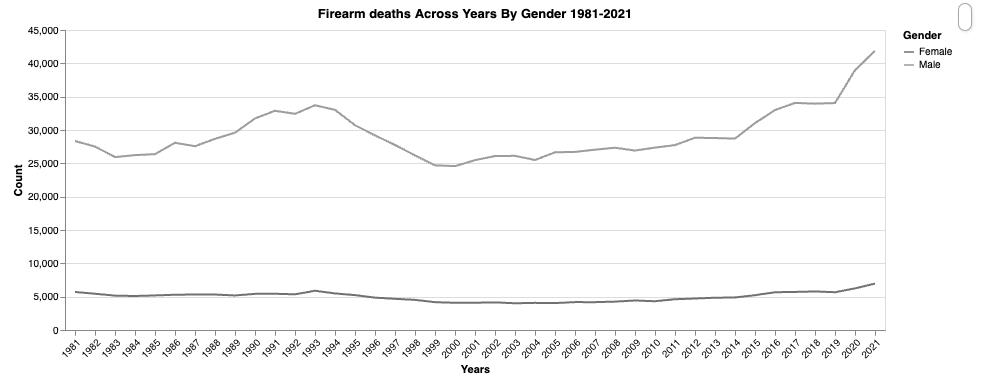

Drawing from the insights gained from the articles, it is important to integrate these elements into the visualization to ensure accessibility for all users. While this graph may have effectively conveyed information to those with Trichromacy, it fell short in communicating the same information to users with visual limitations.

### Key Considerations:
Incorporate gender labels (Male/Female) at the end of each line to for interpretation, enabling users who cannot differentiate between colors to interpret the graph effectively.

In [5]:
gender_firearm_time = alt.Chart(firearm).transform_fold(
    ['Male','Female'],as_=['Gender','Count']

).mark_line( ).encode(
     alt.X('Years:O',
           axis = alt.Axis(labelAngle=0,title='Year',labelFontSize = 12,
                         titleFontSize = 12,
                         values=[1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020] ),
         ),
    alt.Y('Count:Q',title='Number Of Firearm Deaths'),
    alt.Color('Gender:N'),
    tooltip = ['Years:O','Count:Q','Gender:N']
    
).properties(
    title=('Firearm Deaths Across Years By Gender 1981-2021')
)
gender_firearm_time
labels = alt.Chart(firearm).transform_fold(
    ['Male','Female'],as_=['Gender','Count']

).mark_text(align='left', dx=6,dy = -10,size = 13).encode(
    alt.X('Years:O', aggregate='max'),
    alt.Y('Count:Q', aggregate={'argmax': 'Count'}),
    alt.Text('Gender:N'),
    alt.Color('Gender:N', legend=None)
)
chart = alt.layer(gender_firearm_time,labels).configure(
    aria=True

).configure_view(
    stroke='transparent'
).properties(
    
)

source_text = alt.Chart(pd.DataFrame({'source': ['Source:https://usafacts.org/data/topics/security-safety/crime-and-justice/firearms/firearm-deaths/']})).mark_text(
    fontSize=12,
    text='source',
    dx=150,
    dy=200
).encode(
    text='source:N'
)

desc_text = alt.Chart(pd.DataFrame({'desc': ['Male firearm deaths have risen significantly compared to females, with males contributing more to the overall firearm-related fatalities']})).mark_text(
    fontSize=14,
    text='source',
    dx=-90,
    dy=230
).encode(
    text='desc:N'
)

final = chart+source_text+desc_text
final.save('gender.html')

### Improvements


I improved this graph's accessibility by adding labels at the end of each line, ensuring that users with color disabilities can understand the information. Additionally, I enhanced its accessibility by adjusting the tick labels on the x-axis, displaying the years with a 5-year gap for easier interpretation. I also updated the y-label to "Number of Firearm Deaths" to provide clarity.  This graph is now more user-friendly, especially for individuals with monochromacy, as the label placement next to each line helps users identify what each line represents in the graph.
To enhance authenticity, I included the data source of the dataset. I have also added the description about the key take away from the graph. This can be read by the screen reader. Hence, making the graph accessible for all kind of users with full color vision, partial color perception, and complete colorblindness. While I couldn't implement audio recording for screen readers in Altair, I plan to explore this feature for my final project.


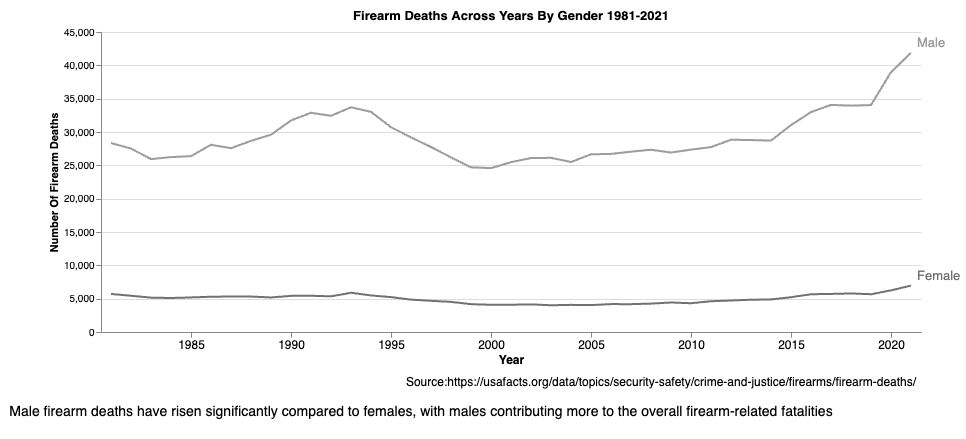